#              Project - Predict automobile price| ML | EDA

## Objective :-
Use Machine learning to predict the price of a car based on several characteristics. The objective is to build a model to understand the factors that drive the car of the price. This will help your automobile company launch their new car in the market effectively by pricing it better.

## Data description:
Attribute: Attribute Range

1.symboling: -3, -2, -1, 0, 1, 2, 3 (Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.)

2.make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes- benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

3.fuel-type: diesel, gas.

4.aspiration: std, turbo.

5.num-of-doors: four, two.

6.body-style: hardtop, wagon, sedan, hatchback, convertible.

7.drive-wheels: 4wd, fwd, rwd.

8.engine-location: front, rear.

9.wheel-base: continuous from 86.6 120.9.

10.length: continuous from 141.1 to 208.1.

11.Width: continuous from 60.3 to 72.3.

12.height: continuous from 47.8 to 59.8.

13.curb-weight: continuous from 1488 to 4066.

14.engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

15.num-of-cylinders: eight, five, four, six, three, twelve, two.

16.engine-size: continuous from 61 to 326.

17.fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

18.bore: continuous from 2.54 to 3.94.

19.stroke: continuous from 2.07 to 4.17.

20.compression-ratio: continuous from 7 to 23.

21.horsepower: continuous from 48 to 288.

## 
* The column “Price” is the target variable and rest of the columns are independent variables.

* The independent variables are again divided into Categorical and Numerical variables.

* Numerical variables: [‘wheelbase’, ‘carlength’, ‘carwidth’, ‘carheight’, ‘curbweight’, ‘enginesize’, ‘boreratio’, ‘stroke’, ‘compressionratio’, ‘horsepower’, ‘peakrpm’, ‘citympg’, ‘highwaympg’]

* Categorical variables: [‘symboling’, ‘fueltype’, ‘aspiration’, ‘doornumber’, ‘carbody’, ‘drivewheel’, ‘enginelocation’, ‘enginetype’, ‘cylindernumber’, ‘fuelsystem’ ‘car_name’]

In [367]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Reading and Understanding Data


In [368]:
# Import CSV Files
pd.set_option("display.max_columns",100)
df=pd.read_csv("AutoData (1).csv")
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [369]:
df.tail()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## Data Inspection


In [370]:
df.shape

(205, 25)

In [371]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [373]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

##  Data Cleaning

In [374]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

symboling           0.0
make                0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

## Exploratory Data Analysis ( EDA )

### Univariate Analysis

* Price : Target Variable

In [375]:
df["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

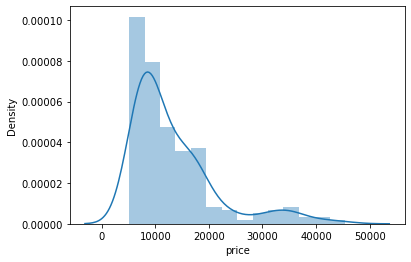

In [376]:
sns.distplot(df['price'])

In [377]:
# Inference
# Mean and median of price are significantly different.
# Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
# Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.

## 
- Symboling

In [378]:
# symboling : Its assigned insurance risk rating
#             A value of +3 indicates that the auto is risky,
#             -3 that it is probably pretty safe.(Categorical)

In [379]:
# Let's see the count of automobile in each category and percent share of each category.

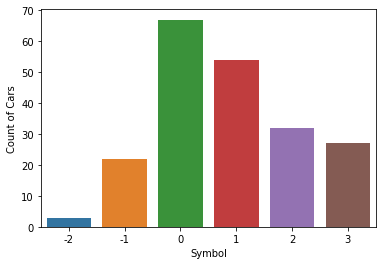

<Figure size 432x288 with 0 Axes>

In [380]:
plt1 = sns.countplot(df['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

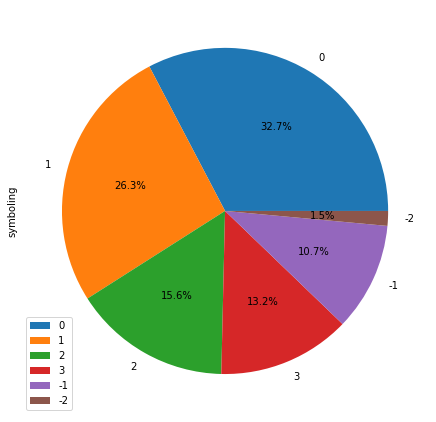

<Figure size 432x288 with 0 Axes>

In [381]:
df_sym = pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

In [382]:
# Let's see average price of cars in each symbol category.

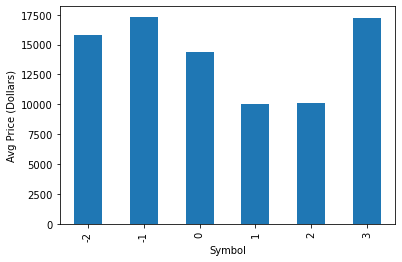

In [383]:
plt1 = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

In [384]:
# Inference
# More than 50% of cars are with symbol 0 or 1.
# Average price of car is lower for 0,1 & 2 symbol category.

## 
* Car Name

In [385]:
df.make.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [386]:
# It is observed that Car Name consists of two parts 'car company' + ' ' + 'Car Model'
# Let's split out car company to a new column.

In [387]:
df['brand'] = df.make.str.split(' ').str.get(0).str.upper()

In [388]:
len(set(df.brand.values))

27

In [389]:
# Let's see companies and their no of models.

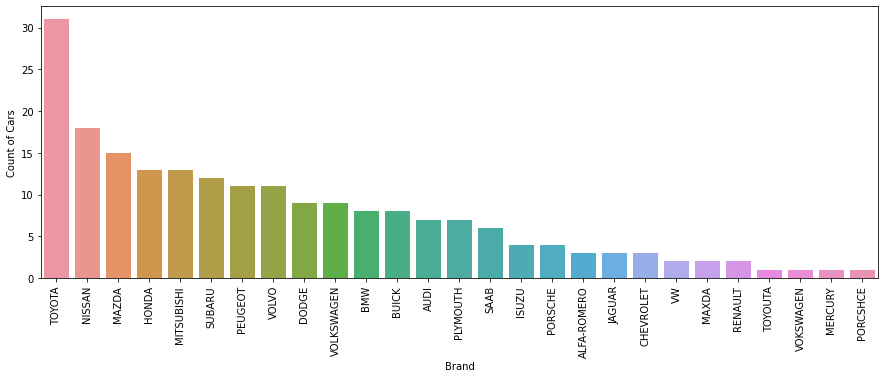

<Figure size 432x288 with 0 Axes>

In [390]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [391]:
# It's noticed that in brand names,
# VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
# MAZDA is also spelled as MAXDA
# PORSCHE as PORSCHE and PORCSCHE.
# Let's fix these data issues.
df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['MAXDA'], 'MAZDA')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')
df['brand'] = df['brand'].replace(['TOYOUTA'], 'TOYOTA')

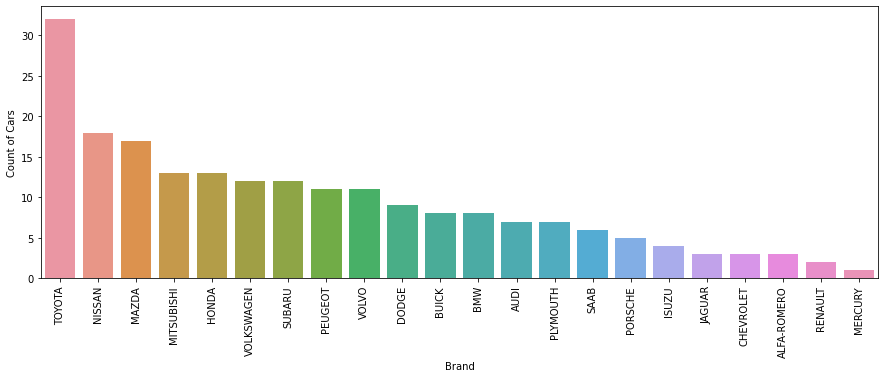

<Figure size 432x288 with 0 Axes>

In [392]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [393]:
df.brand.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: brand, dtype: object

In [394]:
# Inference
# Toyota, a Japanese company has the most no of models.

In [395]:
# Let's see average car price of each company.

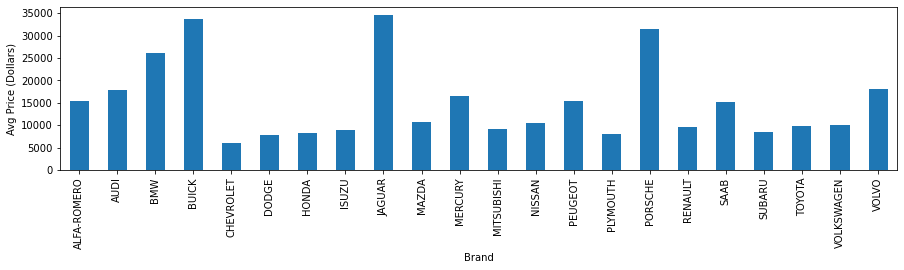

In [396]:
df_comp_avg_price = df[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

In [397]:
#df_comp_avg_price

In [398]:
df = df.merge(df_comp_avg_price, on = 'brand')

In [399]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

In [400]:
# Inference:
# Toyota has considerably high no of models in the market.
# Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price.
# Some of the Luxury brans are

## 
* Fuel Type

In [402]:
# Let's see how price varies with  Fuel Type

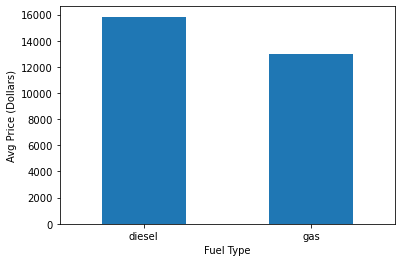

In [403]:
df_fuel_avg_price = df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

In [404]:
# Inference
# Diesel cars are priced more than gas cars.

##
 - Aspiration

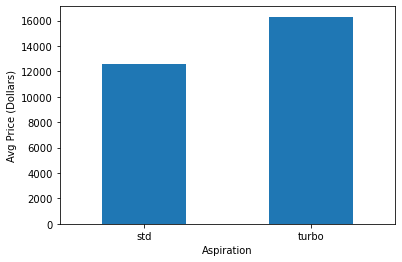

In [405]:
df_aspir_avg_price = df[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

In [406]:
# Inference
# Cars with turbo aspiration engine are priced more than standard ones.

## 
- Door Numbers

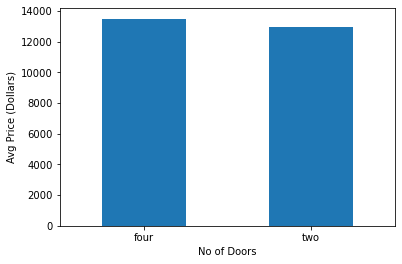

In [407]:
df_door_avg_price = df[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

In [408]:
# Inference
# Number of doors doesn't seem to have much effect on price.

## 
- Drivewheel

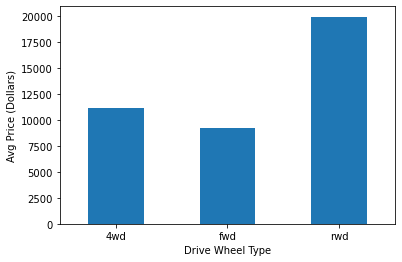

In [409]:
df_drivewheel_avg_price = df[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

In [410]:
# Inference
# Cars with Rear wheel drive have a higher price value.

## 
- Wheel base

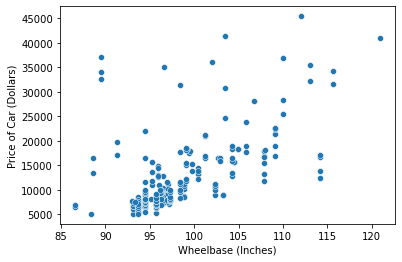

In [411]:
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = df)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()



In [412]:
# Inference
# Most cars has a wheel base around 95 inches.
# Price has a slight positive correlation with wheelbase.

## 
- Car Dimensions

In [413]:
# Let's see how price varies with Car's length, width,height and weight.

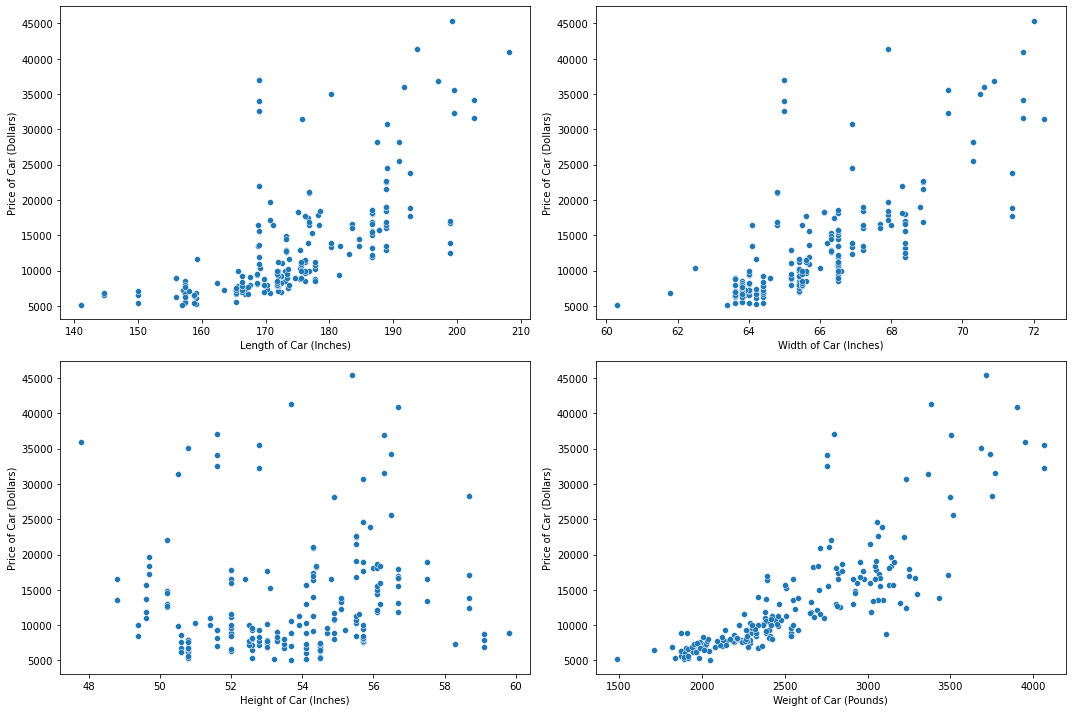

In [414]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

In [415]:
# Inference
# Length width and weight of the car is positively related with the price.
# There is not much of a correlation with Height of the car with price.

## 
- Engine Specifications

## 
- Engine Type, Cylinder, Fuel System

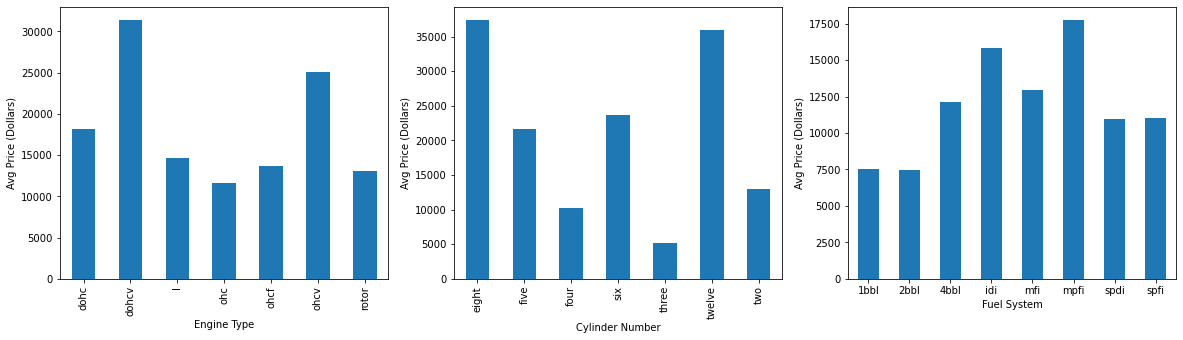

In [416]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_engine_avg_price = df[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
#
df_cylindernumber_avg_price = df[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
#
df_fuelsystem_avg_price = df[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()


In [417]:
# Inference
# DOHCV and OHCV engine types are priced high.
# Eight and twelve cylinder cars have higher price.
# IDI and MPFI fuel system have higher price.

## 
- Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio

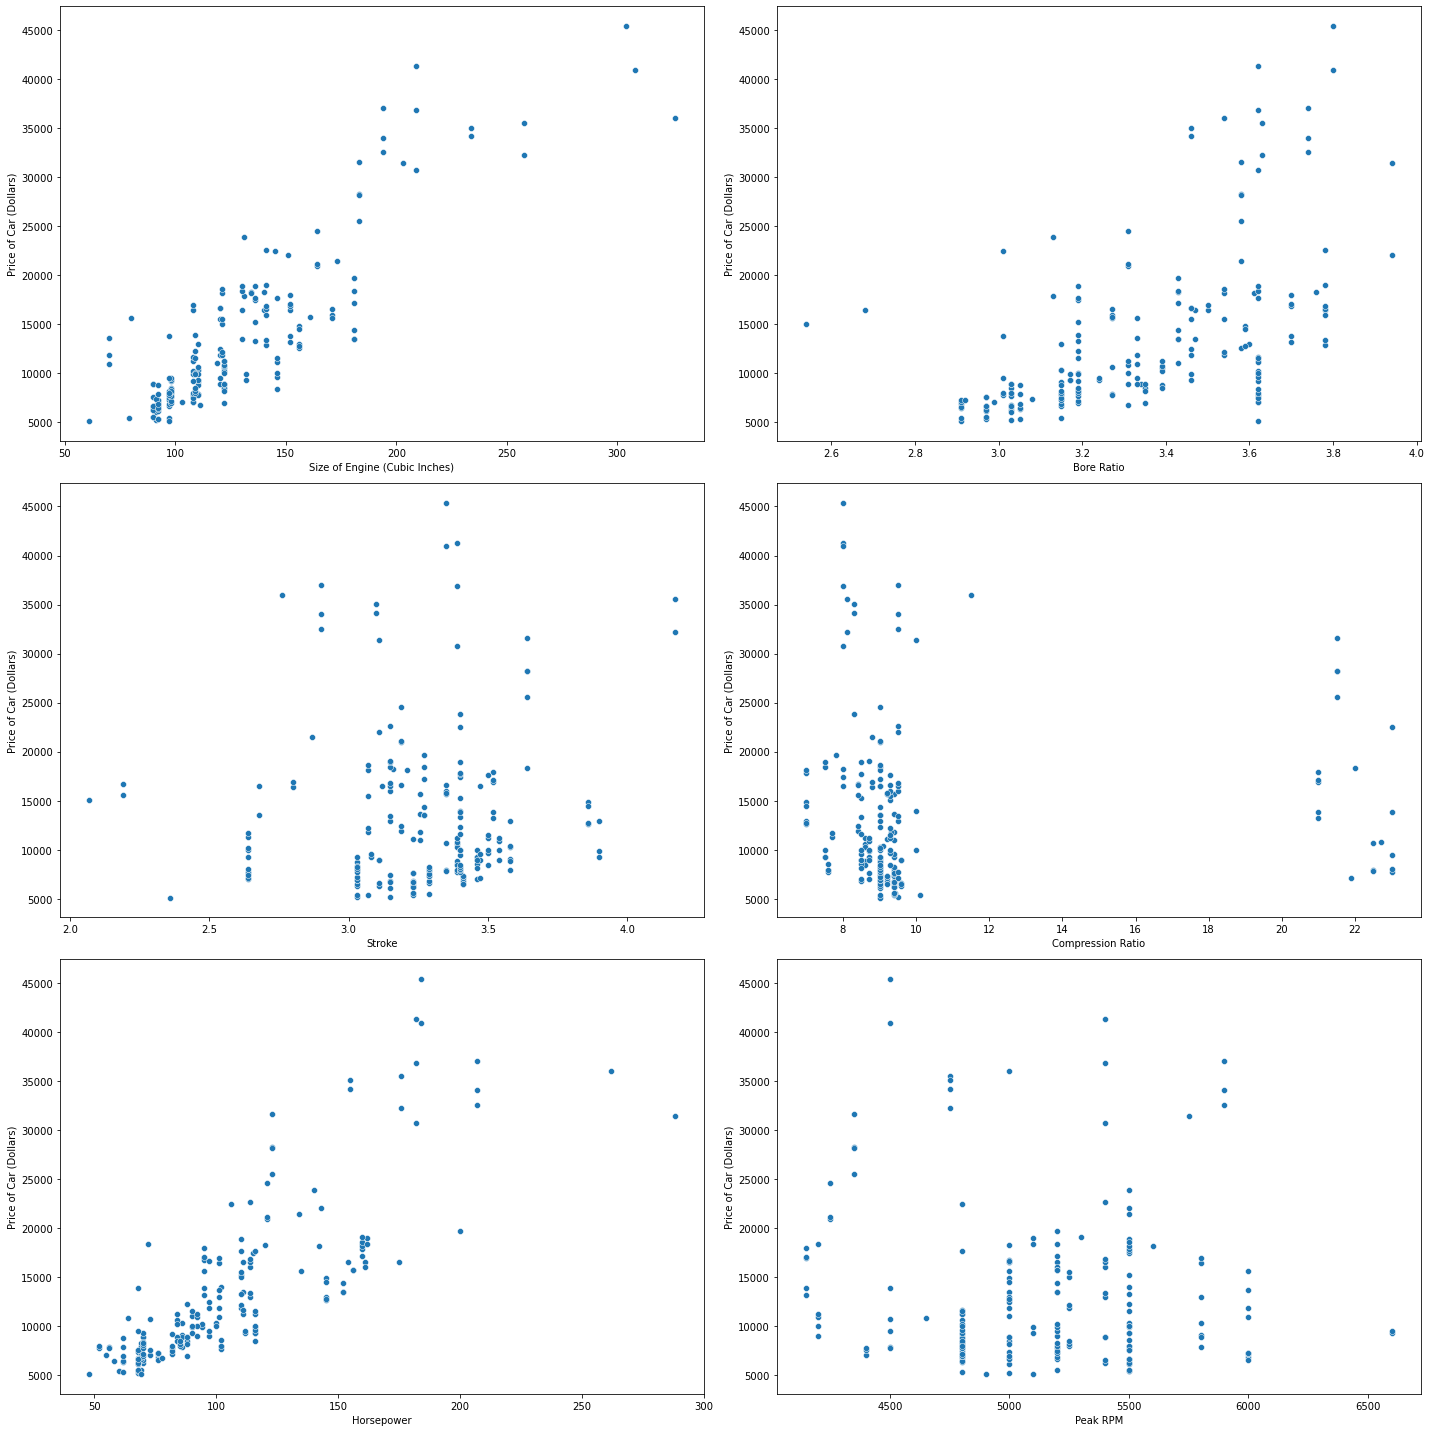

In [418]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = df, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = df, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = df, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()


In [419]:
# Inference
# Size of Engine, bore ratio, and Horsepower has positive correlation with price.

## 
- City Mileage & Highway Mileage

In [420]:
# A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

In [421]:
# Let's see how price varies with mileage.

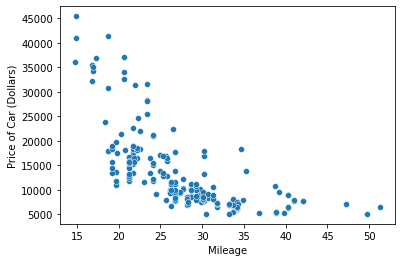

In [422]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

In [423]:
# Inference 
# Mileage has a negative correlation with price.

###  Pick the best variable for making a simple linear regression model

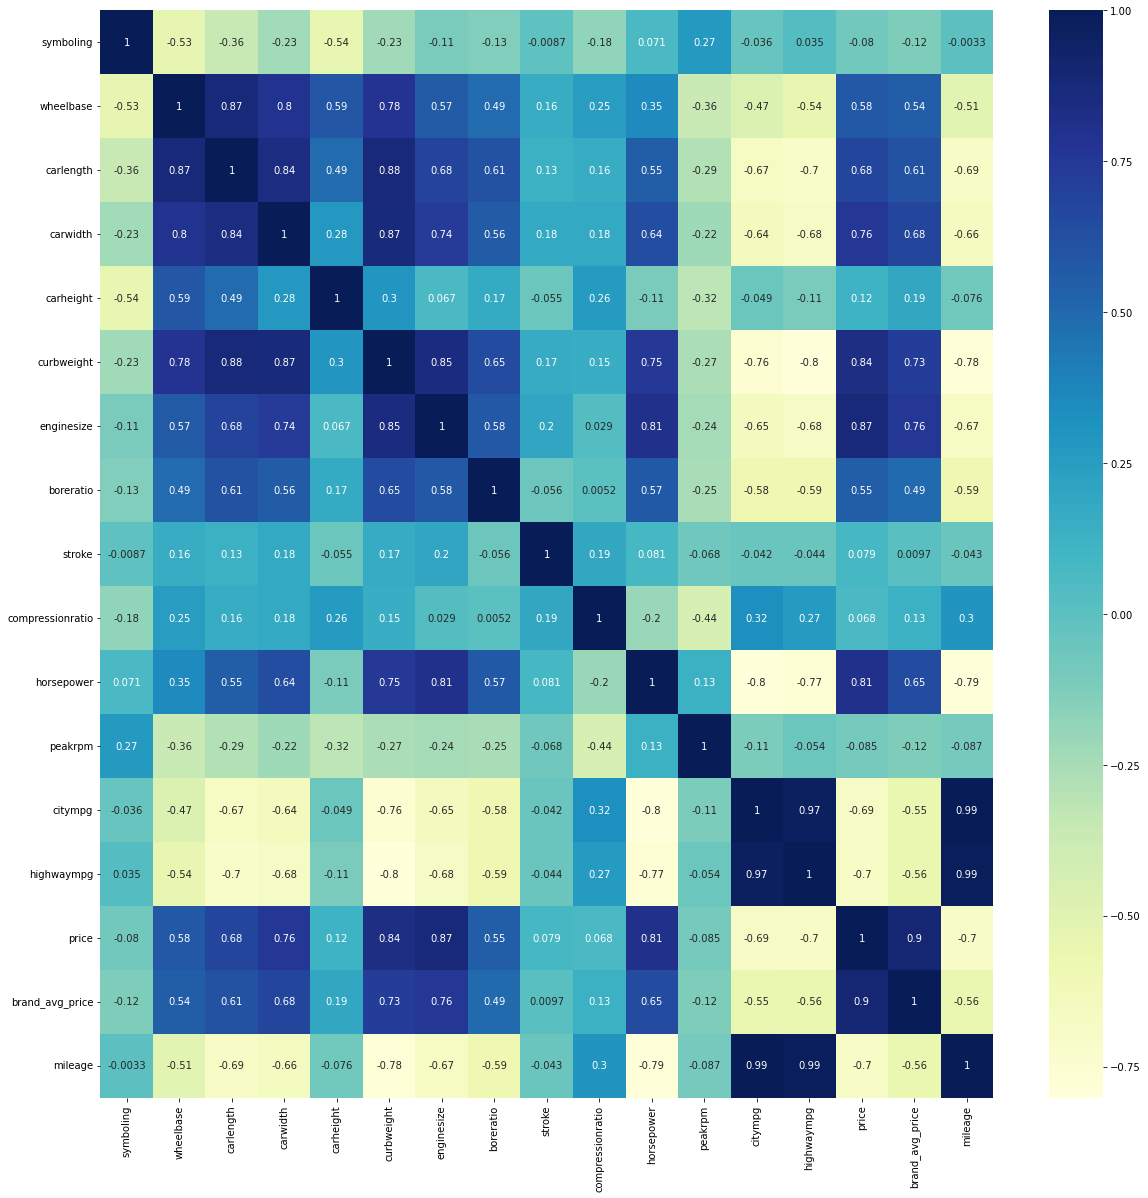

In [424]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 
- With the heatmap we can say that enginesize size is highly correlated to Price of the automobile



- HENCE ENGINESIZE CAN BE THE BEST VARIABLE FOR MAKING A LINEAR REGRESSION VARIABLE

### Bivariate Analysis

#### Brand Category - Mileage

##### It is expected that luxury brands don't care about mileage. Let's find out how price varies with brand category and mileage.

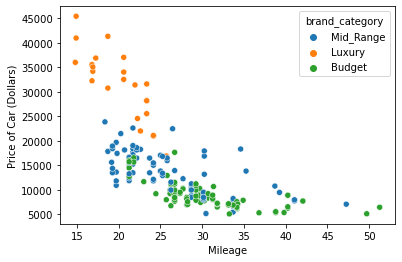

In [425]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Brand Category - Horsepower

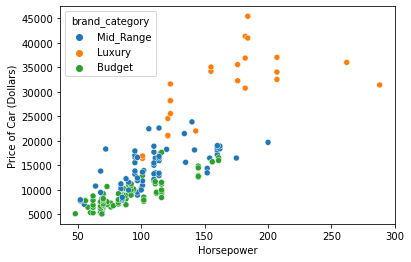

In [426]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Mileage - Fuel Type

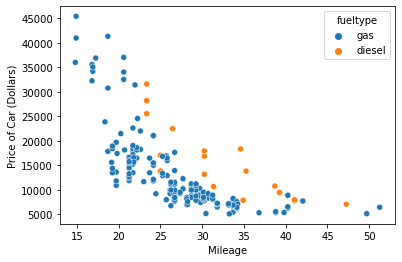

In [427]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Horsepower - Fuel Type

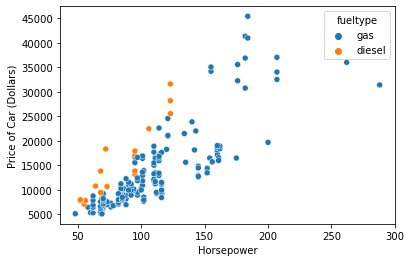

In [428]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Summary Univariate and Bivriate Analysis:

#### From the above Univariate and bivariate analysis we can filter out variables which does not affect price much.

#### The most important driver variable for prediction of price are:-

- Brand Category
- Fuel Type
- Aspiration
- Car Body
- Drive Wheel
- Wheelbase
- Car Length
- Car Width
- Curb weight
- Engine Type
- Cylinder Number
- Engine Size
- Bore Ratio
- Horsepower
- Mileage

## Linear Regression Model

In [429]:
auto = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

In [430]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.80


### Visualising the Data

#### Visualising Numeric Variables

#### Let's make a pairplot of all the numeric variables

<Figure size 1080x1080 with 0 Axes>

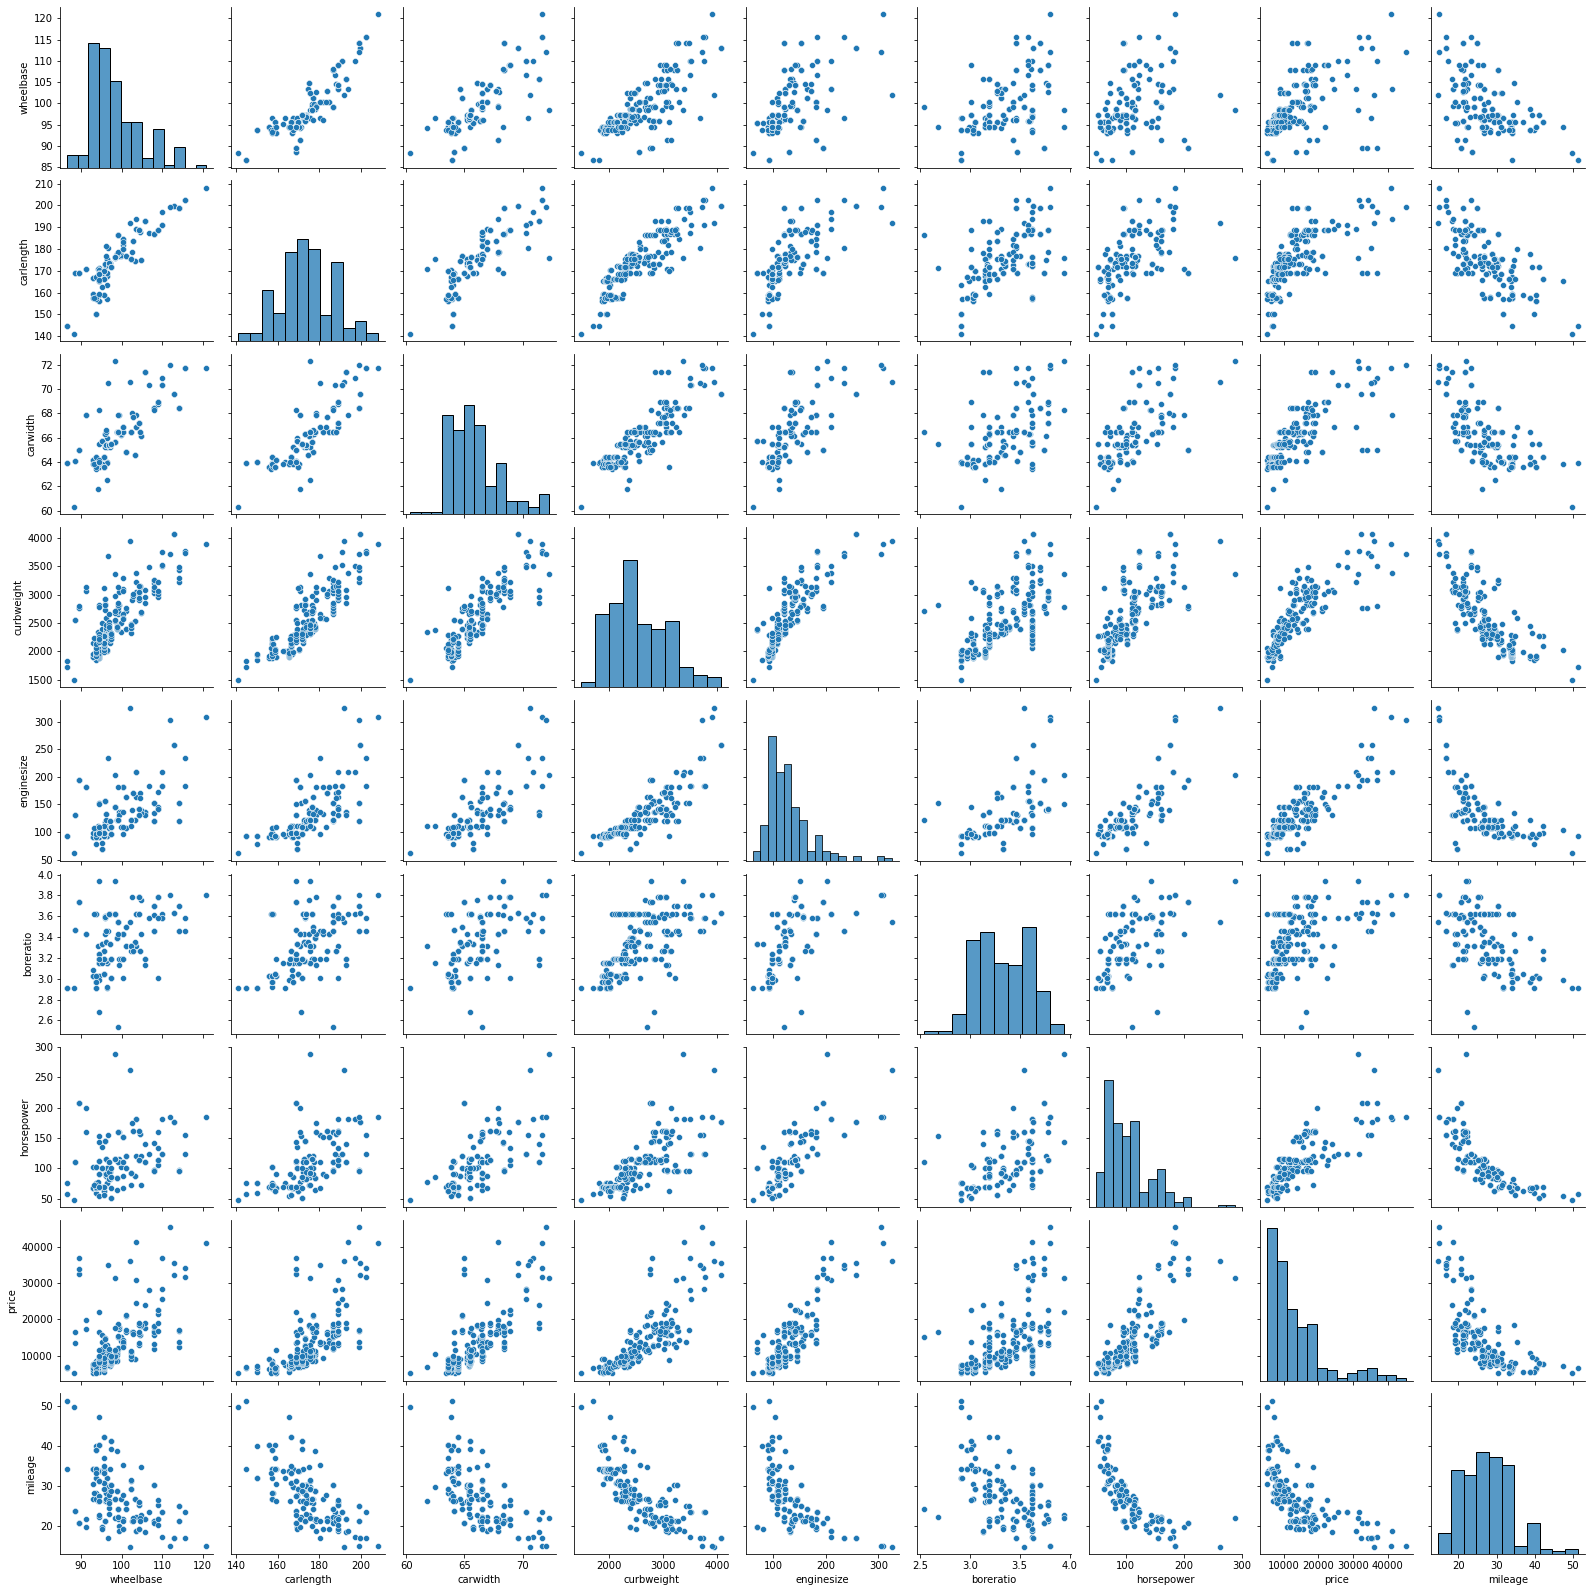

In [431]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

### Visualising Categorical Variables

#### Let's make a boxplot for categorical variables.

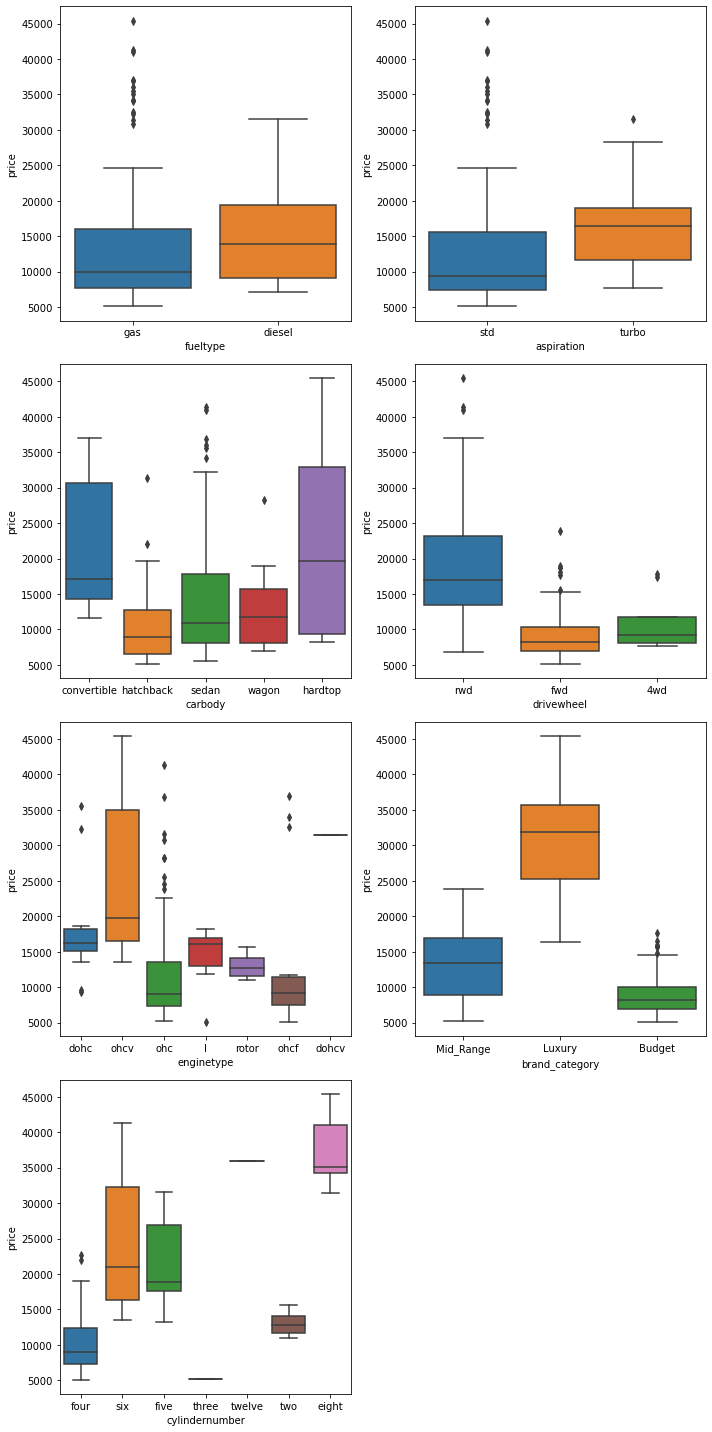

In [432]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.tight_layout()
plt.show()

### Data Preparation

#### Dummy Variables

In [433]:
# Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable 

In [434]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)

In [435]:
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)

In [436]:
eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)

In [437]:
drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

In [438]:
carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

In [439]:
asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

In [440]:
fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

In [441]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

## Perform train test split

## Model Building

### Splitting the Data into Training and Testing sets

In [442]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [443]:
#Rescaling the Features

# We will use min-max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [444]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [445]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,four,six,three,twelve,two,Luxury,Mid_Range,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1


In [446]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,four,six,three,twelve,two,Luxury,Mid_Range,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.358265,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.118881,0.412587,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.324786,0.494030,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


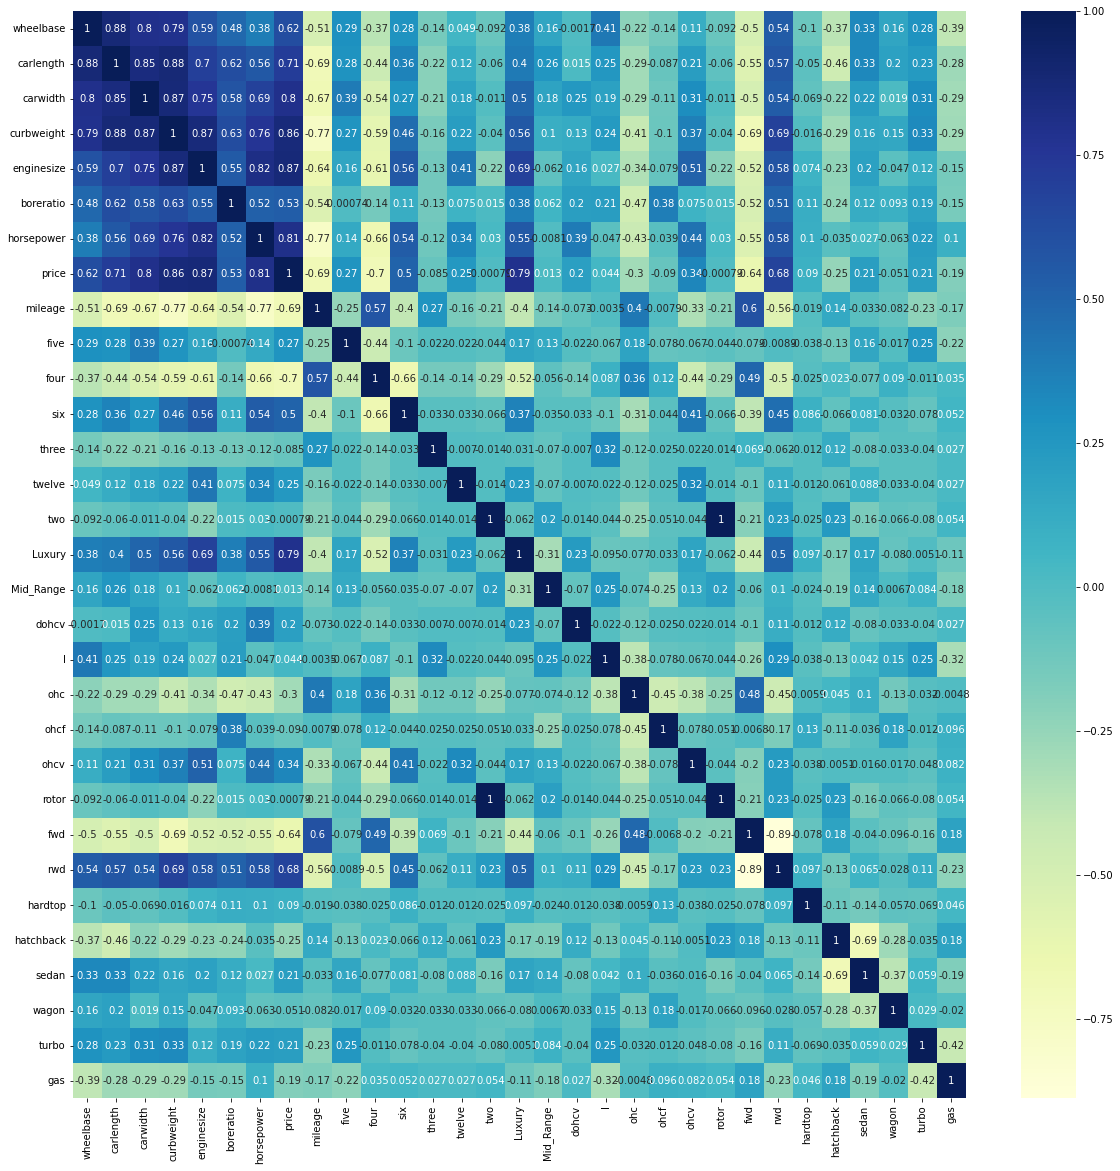

In [447]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [448]:
#Dividing into X and Y sets for the model building

y_train = df_train.pop('price')
X_train = df_train

##  Build model using best variable and report the R2

In [362]:
x_bestvariable = df['enginesize']
y_variable = df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_bestvariable,y_variable, test_size = 0.3, random_state = 60)

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]


In [363]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

prediction = lm.predict(X_test)

In [364]:
from sklearn.metrics import r2_score 
score = r2_score(y_test, prediction)
score

0.8164627964271307

## Make a multiple regression model

- Apply feature selection approaches discussed in the class

### RFE
- Recursive feature elimination

In [449]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [450]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)

In [451]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Luxury', True, 1),
 ('Mid_Range', False, 12),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 18),
 ('gas', False, 17)]

In [452]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'twelve', 'Luxury',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [454]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [455]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [456]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [457]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.29e-70
Time:                        16:33:48   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.243      0.0

In [458]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.51
2,curbweight,8.38
9,sedan,6.18
3,horsepower,5.94
8,hatchback,5.68
1,carwidth,5.19
4,mileage,3.74
10,wagon,3.62
7,dohcv,1.73
6,Luxury,1.68


In [459]:
# Dropping curbweight as p-value is high.
X_train_new1 = X_train_rfe.drop(["curbweight"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.11e-68
Time:                        16:33:50   Log-Likelihood:                 198.16
No. Observations:                 143   AIC:                            -376.3
Df Residuals:                     133   BIC:                            -346.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0792      0.044     -1.793      0.0

In [460]:
# Dropping milage as p value is high.
X_train_new2 = X_train_new1.drop(["mileage"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.56e-69
Time:                        16:33:51   Log-Likelihood:                 197.40
No. Observations:                 143   AIC:                            -376.8
Df Residuals:                     134   BIC:                            -350.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0379      0.027     -1.380      0.1

In [461]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.31
7,sedan,6.14
6,hatchback,5.57
8,wagon,3.50
2,horsepower,2.79
1,carwidth,2.26
4,Luxury,1.57
5,dohcv,1.25
3,twelve,1.19


In [462]:
# Dropping sedan as p-value is high.
X_train_new3 = X_train_new2.drop(["sedan"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     208.9
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           3.55e-69
Time:                        16:33:52   Log-Likelihood:                 193.62
No. Observations:                 143   AIC:                            -371.2
Df Residuals:                     135   BIC:                            -347.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0954      0.018     -5.387      0.0

In [463]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.86
2,horsepower,2.63
1,carwidth,2.11
4,Luxury,1.56
5,dohcv,1.24
6,hatchback,1.23
3,twelve,1.18
7,wagon,1.11


In [464]:
# Dropping twelve.
X_train_new4 = X_train_new3.drop(["twelve"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.68e-69
Time:                        16:33:53   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [465]:
# Dropping wagon as p value is high.
X_train_new5 = X_train_new4.drop(["wagon"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.57e-70
Time:                        16:33:54   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [466]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
3,Luxury,1.53
4,dohcv,1.21
5,hatchback,1.13


In [467]:
# Dropping dohcv to see if any change in model.
X_train_new6 = X_train_new5.drop(["dohcv"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.04e-67
Time:                        16:33:54   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

### Residual Analysis of the train data

#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [468]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

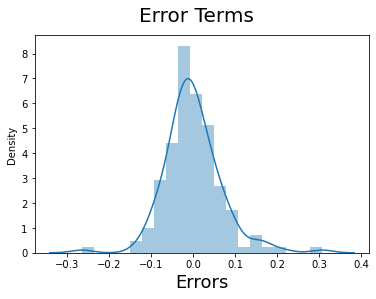

In [469]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions
#### Applying the scaling on the test sets

In [470]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [471]:
y_test = df_test.pop('price')
X_test = df_test

In [472]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'horsepower', 'Luxury', 'hatchback']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [473]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [474]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8986678382302791

Text(0, 0.5, 'y_pred')

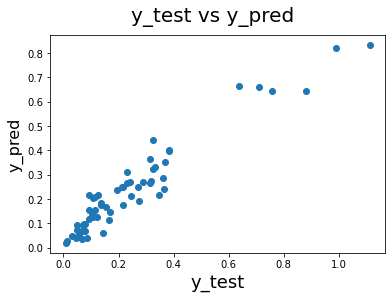

In [475]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## (7) Final model should be interpretable
- What is your understanding of the factors that drive price?

We can see that the equation of our best fitted line is: 

price = 0.3957 carwidth + 0.4402 horsepower + 0.2794 luxury -0.0414 hatchback -0.0824

## 'carwidth', 'horsepower', 'Luxury', 'hatchback' are the important factors that influence the price of the automobile